# Modules

In [1]:
import toolbox_morph
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table


# Define paths

In [2]:
path_main_directory = '/Users/sandrotacchella/ASTRO/SRMP/morph_project/'
path_SFH_table = path_main_directory + 'SFH/'


# Basic test

In [3]:
a = [0.1, 0.4, 0.7]
SFR = [20.0, 100.0, 5.0]

radius_kpc = np.linspace(0.0, 50.0, num=501)

galaxy_test = toolbox_morph.galaxy(radius_kpc, a, SFR, [1.0, 0.3, -0.5, 0.2])



/Users/sandrotacchella/ASTRO/SRMP/morph_project/morph_tools/toolbox_morph.py:74: RuntimeWarning: divide by zero encountered in divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/Users/sandrotacchella/ASTRO/SRMP/morph_project/morph_tools/toolbox_morph.py:75: RuntimeWarning: divide by zero encountered in divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)


In [4]:
galaxy_test.__dict__.keys()

['scale_factor',
 'redshift',
 'Rs',
 'age',
 'Rs_params',
 'SFR',
 'time_dt',
 'radius',
 'time_boundary',
 'time',
 'scale_factor_boundary',
 'mass']

In [5]:
galaxy_test.__dict__

{'Rs': array([ 1.13770201,  2.72926798, 11.33949745]),
 'Rs_params': array([ 1. ,  0.3, -0.5,  0.2]),
 'SFR': array([ 20., 100.,   5.]),
 'age': array([ 2.43388269,  7.13342839, 10.47337617]),
 'mass': array([4.29713904e+10, 4.96103994e+11, 5.20442821e+11]),
 'radius': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.

In [8]:
np.log10(galaxy_test.mass)

array([10.63317941, 11.69557272, 11.71637302])

In [9]:
np.log10(galaxy_test.get_mass_after_mass_loss(redshift_in=0.0))

[9.         1.5        0.42857143]
0.0
2
[0.60412933 0.62189568 1.        ]


11.488214270361029

# Test with SFH

## Read in table

In [8]:
SFH_table = Table.read(path_SFH_table + 'sfh_sm10.50_a1.002310.dat', format='ascii', names=('scale_factor', 'SFH_all', 'SFH_all_up', 'SFH_all_dw', 'SFH_SF', 'SFH_SF_up', 'SFH_SF_dw', 'SFH_Q', 'SFH_Q_up', 'SFH_Q_dw', 'SFH_Cen', 'SFH_Cen_up', 'SFH_Cen_dw', 'SFH_Sat', 'SFH_Sat_up', 'SFH_Sat_dw', 'scale_factor_begin', 'scale_factor_end')) 


In [9]:
print(SFH_table)

scale_factor   SFH_all    SFH_all_up  ... scale_factor_begin scale_factor_end
------------ ----------- ------------ ... ------------------ ----------------
    0.028936 7.57188e-05 -3.50351e-05 ...                0.0         0.057873
    0.059561  0.00112787  8.33206e-05 ...           0.057873         0.061248
    0.062373  0.00364916  0.000763607 ...           0.061248         0.063498
    0.064623  0.00479807   0.00179845 ...           0.063498         0.065748
    0.066873  0.00825626   0.00246062 ...           0.065748         0.067998
    0.069123    0.011718   0.00284543 ...           0.067998         0.070248
    0.071373   0.0142628   0.00683206 ...           0.070248         0.072498
    0.073623   0.0209673    0.0091823 ...           0.072498         0.074748
    0.075873   0.0296027    0.0124159 ...           0.074748         0.076998
    0.078123   0.0407726    0.0155405 ...           0.076998         0.079248
         ...         ...          ... ...                ...    

# Look at galaxy

In [10]:
galaxy_1 = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_all'], [5.0, 0.3, -0.5, 0.2])
galaxy_2 = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [5.0, 0.3, -0.5, 0.2])
galaxy_3 = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_SF'], [5.0, 0.3, -0.5, 0.2])


In [21]:
print(galaxy_1.redshift)


[ 3.35590268e+01  1.57895099e+01  1.50325782e+01  1.44743667e+01
  1.39537182e+01  1.34669647e+01  1.30109005e+01  1.25827119e+01
  1.21799191e+01  1.18003277e+01  1.14419892e+01  1.10621442e+01
  1.06281774e+01  1.01890616e+01  9.78190365e+00  9.40333739e+00
  9.05045328e+00  8.72072361e+00  8.41194187e+00  8.12217327e+00
  7.84971415e+00  7.59305853e+00  7.35087016e+00  7.12195934e+00
  6.90526332e+00  6.69982983e+00  6.50480307e+00  6.29687329e+00
  6.05791015e+00  5.81440292e+00  5.58718135e+00  5.37458326e+00
  5.17531726e+00  4.98809567e+00  4.81192607e+00  4.64579417e+00
  4.48892609e+00  4.34051098e+00  4.19993760e+00  4.06654912e+00
  3.93985724e+00  3.81932356e+00  3.70455401e+00  3.59510254e+00
  3.49064823e+00  3.39081792e+00  3.29534814e+00  3.20392394e+00
  3.11632741e+00  3.03229058e+00  2.95163202e+00  2.87412203e+00
  2.79960864e+00  2.72789359e+00  2.65884893e+00  2.59230241e+00
  2.52814578e+00  2.46622854e+00  2.40645865e+00  2.34870388e+00
  2.29288572e+00  2.23888

In [22]:
print(galaxy_1.get_size())
print(galaxy_2.get_size())
print(galaxy_3.get_size())



[0.10191967 0.10760438 0.10650073 0.10597234 0.10571225 0.10655973
 0.10883106 0.11147612 0.11479671 0.1188477  0.12440876 0.13231321
 0.14137291 0.15162457 0.16251271 0.17406512 0.18628616 0.19920033
 0.21808563 0.23633311 0.25400809 0.27139226 0.28870279 0.30775998
 0.3293443  0.35021746 0.37209615 0.39790189 0.43283141 0.46839975
 0.50347267 0.54233508 0.57983661 0.618577   0.65861359 0.69755339
 0.73941548 0.7803984  0.82248079 0.86526659 0.907888   0.95245742
 0.99610054 1.04182717 1.08687037 1.13328739 1.17971597 1.22692392
 1.27447953 1.32242557 1.37096223 1.41971901 1.46923594 1.51890274
 1.5693345  1.61993911 1.67122268 1.72276451 1.77484131 1.82733641
 1.88009242 1.93342558 1.9868599  2.04112542 2.09520707 2.15039731
 2.20532196 2.26127671 2.31716174 2.37364317 2.43042227 2.48740187
 2.54509433 2.60264058 2.66112585 2.71957715 2.77848939 2.83781511
 2.89712908 2.95728808 3.01738278 3.07792905 3.13880306 3.19962415
 3.26124111 3.32279612 3.38461478 3.44684212 3.50897229 3.5715

In [23]:
galaxy_1.mass

array([1.21007968e+04, 1.24008182e+05, 1.83705032e+05, 2.54813648e+05,
       3.79289938e+05, 5.58910264e+05, 7.81073651e+05, 1.11278271e+06,
       1.58821406e+06, 2.25268052e+06, 3.11170619e+06, 4.17231384e+06,
       6.07043681e+06, 8.64898588e+06, 1.18963362e+07, 1.58542439e+07,
       2.05937764e+07, 2.62015413e+07, 3.28506173e+07, 4.06961871e+07,
       4.97006237e+07, 5.97284643e+07, 7.11241815e+07, 8.37065255e+07,
       9.77649728e+07, 1.13283018e+08, 1.31801552e+08, 1.55459480e+08,
       1.86041210e+08, 2.22541603e+08, 2.63477418e+08, 3.09667632e+08,
       3.60468619e+08, 4.16338780e+08, 4.77597993e+08, 5.43528598e+08,
       6.14882574e+08, 6.92090490e+08, 7.75513290e+08, 8.64621897e+08,
       9.61938007e+08, 1.06685056e+09, 1.17858131e+09, 1.29761478e+09,
       1.42316468e+09, 1.55749113e+09, 1.70058705e+09, 1.85105038e+09,
       2.00912034e+09, 2.17383812e+09, 2.34679611e+09, 2.52770349e+09,
       2.71888405e+09, 2.91892760e+09, 3.12985349e+09, 3.35062658e+09,
      

# Observations

In [29]:
def Mosleh2013_SF(mass):
    alpha, beta, gamma, M0 = 0.109, 0.263, 10**-0.743, 10**10.204
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))

def Mosleh2013_Q(mass):
    alpha, beta, gamma, M0 = 0.014, 0.912, 10**-0.058, 10**10.555
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))



In [36]:
log_mass_plot = np.linspace(9.0, 11.5)

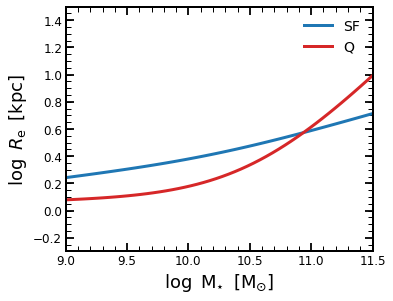

In [40]:


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4.5))

# plot model
sc = ax.plot(log_mass_plot, np.log10(Mosleh2013_SF(10**log_mass_plot)), '-', lw=3, color='C0', label='SF')
sc = ax.plot(log_mass_plot, np.log10(Mosleh2013_Q(10**log_mass_plot)), '-', lw=3, color='C3', label='Q')


# set axes

ax.set_xlabel(r'$\log\/\/\/\mathrm{M_{\star}}\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
ax.set_ylabel(r'$\log\/\/\/R_{\rm e}\/\/\/[\mathrm{kpc}]$', fontsize=18)

ax.set_xlim([9.0, 11.5])
ax.set_ylim([-0.3, 1.5])

ax.legend(frameon=False, fontsize=14)

plt.show()